___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Keras Basics

In [3]:
# You can safely ignore any warnings on importing this
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

2024-04-09 18:56:45.866463: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Simple y=mx+b+noise data

In [4]:
m = 2
x = np.linspace(0,50,100)
b = 3

# 101 is an arbitrary choice to make sure your random values are same as mine!
np.random.seed(101) 
noise = np.random.normal(loc=0.0,scale=4.0,size=len(x))

In [5]:
y = 2*x + b + noise

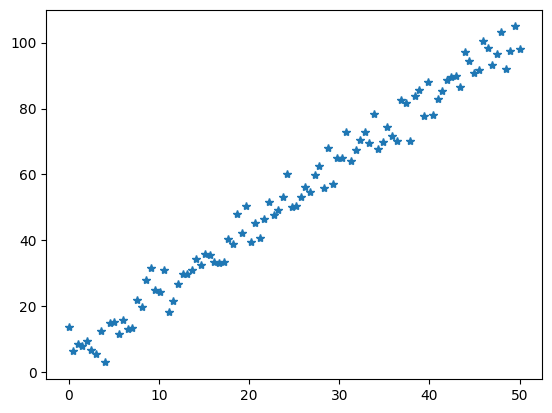

In [6]:
plt.plot(x,y,'*')

## Creating a Neural Network for a Line of Best Fit

In [12]:
from keras.models import Sequential
from keras.layers import Dense

In [13]:
model = Sequential()
# 4 Neurons, expecting only 1 feature with input_dim=1
model.add(Dense(4, input_dim=1, activation='relu'))
# 4 Neurons (Play around with this number!)
model.add(Dense(4, activation='relu'))
# One final output of y, so only 1 neuron
model.add(Dense(1, activation='linear'))
# Compil the layers
model.compile(loss='mse', optimizer='adam')

/usr/local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (132.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

## Train on Data

** NOTE: FOR THIS SIMPLE EXAMPLE, I WILL SKIP THE TRAIN TEST SPLIT!!!! **

In [14]:
model.fit(x, y, epochs=500, verbose=1)

Epoch 1/500


AttributeError: module 'keras.src.backend' has no attribute 'convert_to_numpy'

## Predicting on new x points

Our previous x was 50 linspace points between 0 and 100. Let's predict for 1000 values between 0 and 100, drawing a line for our predictions (our line of best fit).

In [75]:
x_for_predictions = np.linspace(0,50,1000)

In [76]:
y_predicted = model.predict(x_for_predictions)

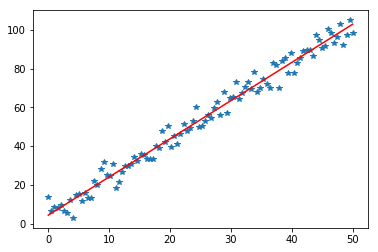

In [78]:
# Original X and Y
plt.plot(x,y,'*')
# Our Model's prediction Line
plt.plot(x_for_predictions,y_predicted,'r')

# Evaluating Our Error

In [82]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [83]:
# Labels we do know
prediction_for_true_y = model.predict(x)

In [84]:
mean_squared_error(y,prediction_for_true_y)

16.820542043655355

In [85]:
mean_absolute_error(y,prediction_for_true_y)

3.291464809895978

 Notice how MSE value was being reported out by Keras during training!
 
 Is this a good error value? Really depends on the context, refer back to our model evaluation lecture for full details!